# Build quilt data package on the fly

`pip install quilt`

In [1]:
import quilt

pkg_name = 'iconix/deephypebot'

# start with an empty package -- revision1
#quilt.build(pkg_name)

In [2]:
import os
import pandas as pd

BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, '..', 'datasets')
reviews_f = 'reviews_and_metadata'

reviews_5yrs_f = os.path.join(DATA_DIR, f'{reviews_f}_5yrs.json')
reviews_5yrs_df = pd.read_json(reviews_5yrs_f)
print(f'num_reviews: {len(reviews_5yrs_df)}')
reviews_5yrs_df.head()

num_reviews: 25160


,artist,artist_id,audio_features,author,content,date_published,dek,desc,direction,domain,...,pages_rendered,post_title,posturl,rendered_pages,sitename,song_title,spotify_genres,spotify_id,total_pages,word_count
0,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,"{'danceability': 0.486, 'energy': 0.638, 'key'...",None,New Music\nMt. Joy reached out to us with the ...,2017-11-20T13:33:10.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.buffablog.com,...,NaN,"Mt. Joy - ""Silver Lining""",http://www.buffablog.com/mt-joy-silver-lining/,1.0,buffaBLOG,Silver Lining,"[deep new americana, folk-pop, indie pop, mode...",2fpDrL2Vpee0JnM6AoUFvl,1,86
1,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,"{'danceability': 0.486, 'energy': 0.638, 'key'...",Martin,Folk rockers Mt. Joy have debuted their new so...,2017-11-16T00:00:00.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.discobelle.net,...,NaN,Mt. Joy – Silver Lining | Discobelle.net,http://www.discobelle.net/2017/11/16/mt-joy-si...,1.0,Discobelle,Silver Lining,"[deep new americana, folk-pop, indie pop, mode...",2fpDrL2Vpee0JnM6AoUFvl,1,83
2,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,"{'danceability': 0.486, 'energy': 0.638, 'key'...",Nasko,You know we're digging Mt. Joy.\nTheir new sin...,2017-11-14T14:30:26.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.stereofox.com,...,NaN,Mt. Joy - Silver Lining | Stereofox Music Blog,https://www.stereofox.com/mt-joy-silver-lining/,1.0,Stereofox,Silver Lining,"[deep new americana, folk-pop, indie pop, mode...",2fpDrL2Vpee0JnM6AoUFvl,1,75
3,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,"{'danceability': 0.486, 'energy': 0.638, 'key'...",D & d,"Nothing against the profession, but the U.S. h...",2018-06-20T10:53:00.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,indieobsessive.blogspot.com,...,NaN,“Silver Lining” by Mt. Joy – A Song Review,http://indieobsessive.blogspot.com/2017/11/sil...,1.0,Indie Obsessive,Silver Lining,"[deep new americana, folk-pop, indie pop, mode...",2fpDrL2Vpee0JnM6AoUFvl,1,416
4,Opia,70zHrrrPfBkVV44AEhFyyh,"{'danceability': 0.609, 'energy': 0.623, 'key'...",Nat Morawski,Connecticut duo Opia have released a guitar he...,2018-05-24T00:00:00.000Z,NaN,\n\nI don’t know why but this feels like a bre...,ltr,acidstag.com,...,NaN,Opia – ‘Four Winds’,https://acidstag.com/2018/05/opia-four-winds/,1.0,acid stag,Four Winds,[vapor soul],3NPiANHZYahLZhUT00GwTw,1,148


In [3]:
# https://stackoverflow.com/a/38231651

# quilt cannot handle column 'audio_features' because it is a dict - convert it into multiple columns
# convert original 'audio_features' column from dict to JSON string
audio_df = reviews_5yrs_df['audio_features'].apply(pd.Series)[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]
str_df = reviews_5yrs_df['audio_features'].astype('|S')
reviews_5yrs_df = pd.concat([reviews_5yrs_df.drop(['audio_features'], axis=1), str_df, audio_df], axis=1)
reviews_5yrs_df.columns

Index(['artist', 'artist_id', 'author', 'content', 'date_published', 'dek',
       'desc', 'direction', 'domain', 'error', 'excerpt', 'extract_url',
       'failed', 'genius_id', 'genres', 'itemid', 'lang', 'lead_image_url',
       'masked_content', 'messages', 'next_page_url', 'pages_rendered',
       'post_title', 'posturl', 'rendered_pages', 'sitename', 'song_title',
       'spotify_genres', 'spotify_id', 'total_pages', 'word_count',
       'audio_features', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [4]:
from quilt.data.iconix import deephypebot

# put data in it
deephypebot._set(['reviews_and_metadata_5yrs'], reviews_5yrs_df)
deephypebot.reviews_and_metadata_5yrs()

,artist,artist_id,author,content,date_published,dek,desc,direction,domain,error,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,None,New Music\nMt. Joy reached out to us with the ...,2017-11-20T13:33:10.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.buffablog.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.1780,144.458,199827.0,4.0
1,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,Martin,Folk rockers Mt. Joy have debuted their new so...,2017-11-16T00:00:00.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.discobelle.net,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.1780,144.458,199827.0,4.0
2,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,Nasko,You know we're digging Mt. Joy.\nTheir new sin...,2017-11-14T14:30:26.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.stereofox.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.1780,144.458,199827.0,4.0
3,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,D & d,"Nothing against the profession, but the U.S. h...",2018-06-20T10:53:00.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,indieobsessive.blogspot.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.1780,144.458,199827.0,4.0
4,Opia,70zHrrrPfBkVV44AEhFyyh,Nat Morawski,Connecticut duo Opia have released a guitar he...,2018-05-24T00:00:00.000Z,NaN,\n\nI don’t know why but this feels like a bre...,ltr,acidstag.com,NaN,...,-6.575,1.0,0.1020,0.190000,0.000034,0.0625,0.5820,87.974,223814.0,4.0
5,Opia,70zHrrrPfBkVV44AEhFyyh,Adeel Amini,Now this is inventive. Not that we'd expect an...,2018-05-17T11:30:22.000Z,NaN,\n\nI don’t know why but this feels like a bre...,ltr,pressplayok.com,NaN,...,-6.575,1.0,0.1020,0.190000,0.000034,0.0625,0.5820,87.974,223814.0,4.0
6,ELOHIM,6wKxOKEA3K6R2UZ3COLXEY,Oblivious Pop,Since the very first release from Elohim about...,2018-06-20T16:01:00.000Z,NaN,\n\n?\n\n,ltr,www.obliviouspop.com,NaN,...,-6.560,1.0,0.0347,0.139000,0.000003,0.1110,0.2990,120.046,225531.0,4.0
7,ELOHIM,6wKxOKEA3K6R2UZ3COLXEY,None,New Music\nNow this is how you get a party sta...,2018-05-09T22:44:56.000Z,NaN,\n\n?\n\n,ltr,www.buffablog.com,NaN,...,-6.560,1.0,0.0347,0.139000,0.000003,0.1110,0.2990,120.046,225531.0,4.0
8,ELOHIM,6wKxOKEA3K6R2UZ3COLXEY,None,"This Friday, April 27th, ELOHIM releases her l...",None,NaN,\n\n?\n\n,ltr,www.theautumnroses.com,NaN,...,-6.560,1.0,0.0347,0.139000,0.000003,0.1110,0.2990,120.046,225531.0,4.0
9,ELOHIM,6wKxOKEA3K6R2UZ3COLXEY,None,What a long way Elohim has come since the rele...,2018-04-24T17:12:03.000Z,NaN,\n\n?\n\n,ltr,www.highclouds.org,NaN,...,-6.560,1.0,0.0347,0.139000,0.000003,0.1110,0.2990,120.046,225531.0,4.0


In [5]:
# revision2 - using https://github.com/iconix/openai/blob/0798aa240dd141cb3e66f54f5715dfc02caa3e22/datasets/reviews_and_metadata_5yrs.json
quilt.build(pkg_name, deephypebot)

In [6]:
# log in and push to the registry
quilt.login()
quilt.push(pkg_name, is_public=True)

Launching a web browser...
If that didn't work, please visit the following URL: https://pkg.quiltdata.com/login
Failed to launch the browser: Command '['xdg-open', 'https://pkg.quiltdata.com/login']' returned non-zero exit status 3.

Enter the code from the webpage: eyJjb2RlIjogImMwZGYxNzI5LWY4YzMtNDA0MS05YmNjLWEyZjkyZjZjNmU1NyIsICJpZCI6ICJkMzI3ZTdkYS1lZDFiLTRiMWMtYTFlMC1lM2ZkNzk4NDJlMzkifQ==
Fetching upload URLs from the registry...


  0%|          | 0.00/36.8M [00:00<?, ?B/s]

Uploading 1 fragments (36757347 bytes)...


100%|██████████| 36.8M/36.8M [00:03<00:00, 12.2MB/s]


Uploading package metadata...
Updating the 'latest' tag...
Push complete. iconix/deephypebot is live:
https://quiltdata.com/package/iconix/deephypebot


In [7]:
quilt.inspect(pkg_name)

/home/ubuntu/.local/share/QuiltCli/quilt_packages/pkgs/Quilt/iconix/deephypebot
└── reviews_and_metadata_5yrs: shape (25160, 45), types 'artist': object, 'artist_id': object, 'author': object, 'conte…


# Genre clustering

Spotify genres are amazingly specific, and the tail is long. Let's do some light clustering to help reduce the tail.

The working theory is that this will benefit downstream conditioning of text generation on genre.

In [1]:
import quilt
pkg_name = 'iconix/deephypebot'

quilt.install(pkg_name)

iconix/deephypebot already installed.
Overwrite? (y/n) y
Fragments already downloaded


In [2]:
from quilt.data.iconix import deephypebot

reviews_5yrs_df = deephypebot.reviews_and_metadata_5yrs()
reviews_5yrs_df.sample(frac=1).head()

,artist,artist_id,author,content,date_published,dek,desc,direction,domain,error,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
18871,WILDES,0ypTT9UqAU5sZpPo5JZmjR,None,"15 MAR 2016\n""Bare"" is a song by the London ba...",2016-03-15T00:00:00.000Z,NaN,\n\n?\n\n,ltr,glamglare.com,NaN,...,-10.385,0.0,0.0270,0.78300,0.005140,0.0898,0.1450,129.876,242060.0,4.0
1688,Kllo,0RDC2Krd2nmqseGx5C8PQz,None,While Kllo may not be the most memorable nor r...,2017-10-03T12:33:48.000Z,NaN,\n\n?\n\n,ltr,dotsanddashes.co.uk,NaN,...,-7.981,1.0,0.0591,0.24500,0.519000,0.0971,0.4280,125.040,224109.0,4.0
6912,Super Duper,5zFMLXUnqxwdgTpLCX9LDj,None,Song: Angela\nArtist: Super Duper\nNashvillian...,2015-05-05T11:10:58.000Z,NaN,\n\n?\n\n,ltr,www.audio-aquarium.com,NaN,...,-7.081,1.0,0.0293,0.00173,0.275000,0.3760,0.0931,88.984,175281.0,4.0
4287,VILDE,41EzImgqZFKQDb60paN8io,Wording by Matthew P,New music. It comes in great waves. When the t...,2018-06-20T23:28:00.000Z,NaN,\n\nThe origin and idea for this song comes fr...,ltr,www.sos-music.co.uk,NaN,...,-4.719,0.0,0.0433,0.24400,0.344000,0.1000,0.5450,169.998,248824.0,4.0
9069,Owen Rabbit,7cYskT4KsnVPdwMdjNIUnj,Wording by Matthew P,"Showing an incredible diversity in his sound, ...",2018-06-20T21:53:00.000Z,NaN,\n\n?\n\n,ltr,www.sos-music.co.uk,NaN,...,-5.778,1.0,0.1470,0.03400,0.000017,0.6910,0.1600,70.018,201560.0,4.0


In [3]:
from collections import Counter

c1 = Counter([g for gg in reviews_5yrs_df.spotify_genres for g in gg])
len(c1), c1.most_common()

(498,
 [('vapor soul', 4344),
  ('indie poptimism', 3886),
  ('pop', 3628),
  ('indietronica', 3462),
  ('electropop', 3406),
  ('indie r&b', 3242),
  ('tropical house', 2359),
  ('modern rock', 2171),
  ('indie psych-rock', 1942),
  ('indie pop', 1845),
  ('shimmer pop', 1827),
  ('edm', 1826),
  ('chillwave', 1705),
  ('indie electro-pop', 1451),
  ('rap', 1427),
  ('alternative dance', 1418),
  ('metropopolis', 1303),
  ('hip hop', 1212),
  ('pop rap', 1174),
  ('nu disco', 1086),
  ('dance pop', 1054),
  ('chamber pop', 996),
  ('aussietronica', 973),
  ('art pop', 973),
  ('vapor twitch', 915),
  ('new rave', 907),
  ('indie folk', 886),
  ('indie rock', 885),
  ('house', 867),
  ('vapor pop', 808),
  ('electro house', 752),
  ('indie anthem-folk', 649),
  ('gauze pop', 647),
  ('escape room', 641),
  ('post-teen pop', 606),
  ('folk-pop', 586),
  ('deep australian indie', 572),
  ('electronic trap', 570),
  ('southern hip hop', 544),
  ('trap music', 544),
  ('neo-psychedelic', 5

Let's see how many songs don't belong to a genre with at least **90** samples...

In [4]:
freq_threshold = 90

freq_genres = Counter({k:v for (k,v) in c1.items() if v >= freq_threshold})
len(freq_genres), freq_genres.most_common()

(127,
 [('vapor soul', 4344),
  ('indie poptimism', 3886),
  ('pop', 3628),
  ('indietronica', 3462),
  ('electropop', 3406),
  ('indie r&b', 3242),
  ('tropical house', 2359),
  ('modern rock', 2171),
  ('indie psych-rock', 1942),
  ('indie pop', 1845),
  ('shimmer pop', 1827),
  ('edm', 1826),
  ('chillwave', 1705),
  ('indie electro-pop', 1451),
  ('rap', 1427),
  ('alternative dance', 1418),
  ('metropopolis', 1303),
  ('hip hop', 1212),
  ('pop rap', 1174),
  ('nu disco', 1086),
  ('dance pop', 1054),
  ('chamber pop', 996),
  ('aussietronica', 973),
  ('art pop', 973),
  ('vapor twitch', 915),
  ('new rave', 907),
  ('indie folk', 886),
  ('indie rock', 885),
  ('house', 867),
  ('vapor pop', 808),
  ('electro house', 752),
  ('indie anthem-folk', 649),
  ('gauze pop', 647),
  ('escape room', 641),
  ('post-teen pop', 606),
  ('folk-pop', 586),
  ('deep australian indie', 572),
  ('electronic trap', 570),
  ('southern hip hop', 544),
  ('trap music', 544),
  ('neo-psychedelic', 5

In [5]:
# scratchpad
reviews_5yrs_df.spotify_genres[0]

array(['deep new americana', 'folk-pop', 'indie pop', 'modern rock',
       'new americana', 'stomp and holler'], dtype=object)

In [6]:
import numpy as np
import pandas as pd

# scratchpad
pd.Series(reviews_5yrs_df.spotify_genres[0]).isin(np.array(list(freq_genres.keys()))).any()

True

In [7]:
genre_present = reviews_5yrs_df.apply(lambda x: pd.Series(x.spotify_genres).isin(np.array(list(freq_genres.keys()))).any(), axis=1)
genre_present.value_counts()

True     19313
False     5847
dtype: int64

So **5,847** reviews don't fit into the **127** most-frequent genres.

Let's see if we can cluster these with less-specific genre tags.

## Add 1gram genre to genreless samples

If the 1gram genre is a top genre already, we should also gather samples into that existing genre (e.g. 'minimal tech house' -> 'house').

We'll accomplish this by adding the 1gram to the sample's genre list.

In [8]:
def add1Grams(genres):
    return np.array(list(set(np.append(genres, [word for genre in genres for word in genre.split()]))))

reviews_5yrs_df.loc[genre_present == False, 'spotify_genres'] = reviews_5yrs_df.loc[genre_present == False, 'spotify_genres'].apply(add1Grams)
reviews_5yrs_df.loc[genre_present == False].spotify_genres

15                                                     []
16                                                     []
22                                                     []
47                                                     []
48                                                     []
49                                                     []
50                                                     []
51                                                     []
52                                                     []
53                                                     []
64                                                     []
65                                                     []
68                                                     []
69                                                     []
70                                                     []
78                                                     []
79                                                     []
80            

Recalculate `freq_genres` ...

In [9]:
c1 = Counter([g for gg in reviews_5yrs_df.spotify_genres for g in gg])
freq_genres = Counter({k:v for (k,v) in c1.items() if v >= freq_threshold})
len(freq_genres), freq_genres.most_common()

(130,
 [('vapor soul', 4344),
  ('indie poptimism', 3886),
  ('pop', 3799),
  ('indietronica', 3462),
  ('electropop', 3406),
  ('indie r&b', 3242),
  ('tropical house', 2359),
  ('modern rock', 2171),
  ('indie psych-rock', 1942),
  ('indie pop', 1845),
  ('shimmer pop', 1827),
  ('edm', 1826),
  ('chillwave', 1705),
  ('rap', 1452),
  ('indie electro-pop', 1451),
  ('alternative dance', 1418),
  ('metropopolis', 1303),
  ('hip hop', 1212),
  ('pop rap', 1174),
  ('nu disco', 1086),
  ('dance pop', 1054),
  ('chamber pop', 996),
  ('aussietronica', 973),
  ('art pop', 973),
  ('house', 917),
  ('vapor twitch', 915),
  ('new rave', 907),
  ('indie folk', 886),
  ('indie rock', 885),
  ('vapor pop', 808),
  ('electro house', 752),
  ('indie anthem-folk', 649),
  ('gauze pop', 647),
  ('escape room', 641),
  ('post-teen pop', 606),
  ('folk-pop', 586),
  ('deep australian indie', 572),
  ('electronic trap', 570),
  ('southern hip hop', 544),
  ('trap music', 544),
  ('neo-psychedelic', 5

Visual [diff](https://www.diffchecker.com) of `freq_genres`, before and after adding 1grams ... `indie`, `rock`, and `trance` are new entrants, and genres like `pop`, `rap`, `house`, and `lo-fi` receive decent gains.

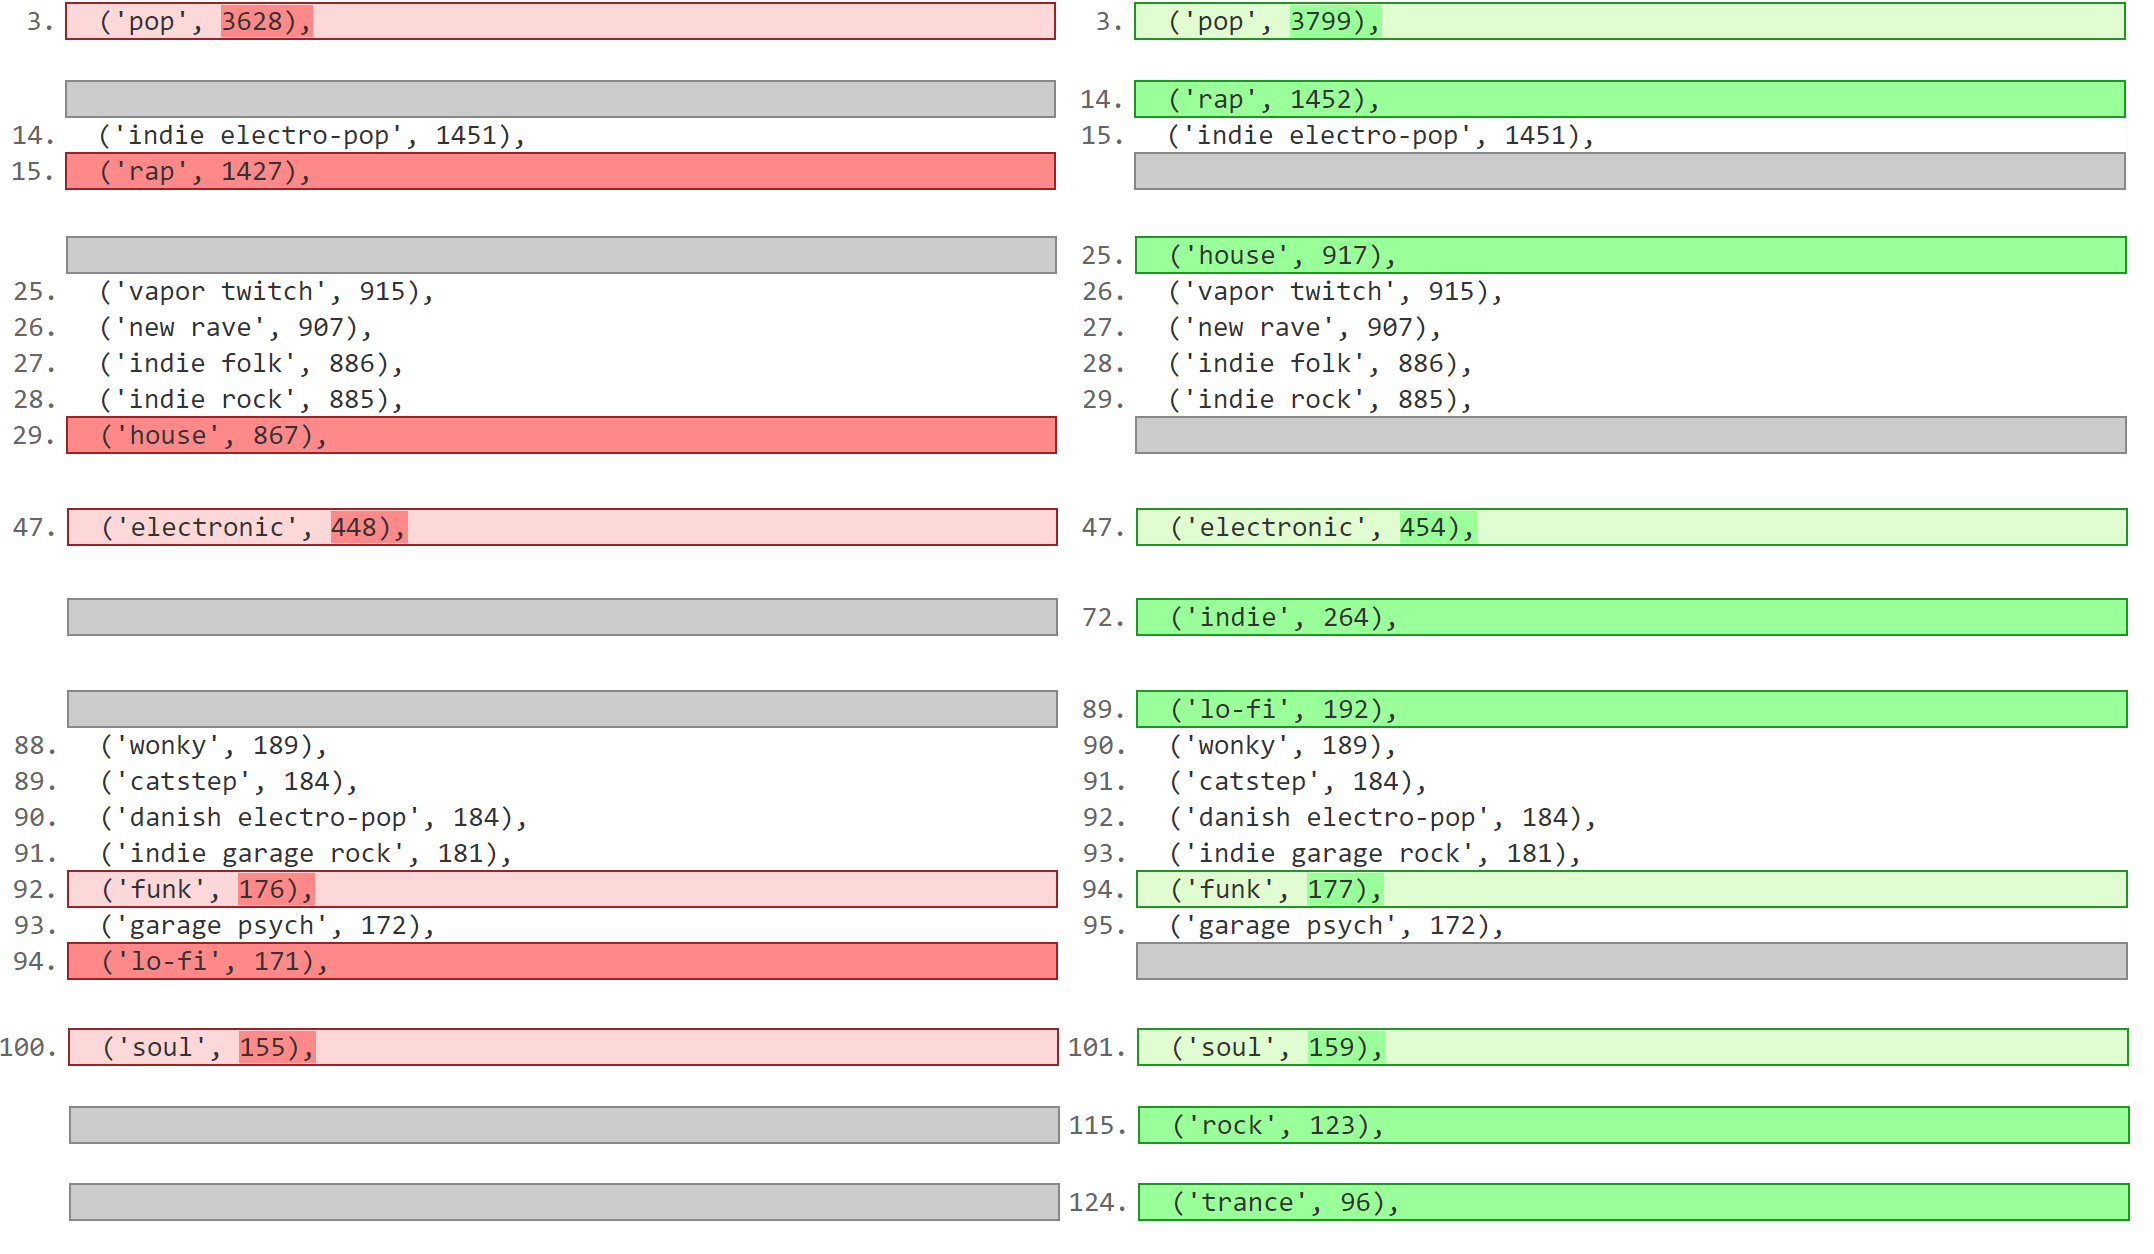

In [10]:
genre_present = reviews_5yrs_df.apply(lambda x: pd.Series(x.spotify_genres).isin(np.array(list(freq_genres.keys()))).any(), axis=1)
genre_present.value_counts()

True     19871
False     5289
dtype: int64

Recovered **558** samples doing this.

In [11]:
genreless_df = reviews_5yrs_df.loc[genre_present == False]
genreless_df.spotify_genres.value_counts()

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/algorithms.py:761: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  keys, counts = f(values, dropna)


[vogue]                            15
[neo-singer-songwriter]            15
[fake]                             12
[electrofox]                       12
[filthstep]                        11
[dreamo]                           10
[mashup]                            6
[covertrance]                       6
[chillhop]                          6
[tracestep]                         4
[j-rap]                             3
[disco]                             3
[indiecoustica]                     2
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]          

A lot of genre lists are actually **empty** (_duh, forgot that was possible_)!

In [12]:
flat_genreless = [genre for ndarray in list(genreless_df.spotify_genres) for genre in list(ndarray)]
c2 = Counter(flat_genreless)
len(c2), c2.most_common()

(151,
 [('hop', 27),
  ('canadian', 18),
  ('hip', 18),
  ('jazz', 16),
  ('tunes', 15),
  ('movie', 15),
  ('movie tunes', 15),
  ('neo-singer-songwriter', 15),
  ('vogue', 15),
  ('deep', 14),
  ('canadian folk', 13),
  ('folk', 13),
  ('classical', 12),
  ('fake', 12),
  ('electrofox', 12),
  ('band', 11),
  ('filthstep', 11),
  ('dreamo', 10),
  ('era', 10),
  ('roots reggae', 10),
  ('roots', 10),
  ('reggae', 10),
  ('vocal jazz', 9),
  ('vocal', 9),
  ('glitch hop', 9),
  ('glitch', 9),
  ('new', 8),
  ('disco', 8),
  ('destroy techno', 7),
  ('techno', 7),
  ('destroy', 7),
  ('wind', 7),
  ('marching', 7),
  ('wind ensemble', 7),
  ('concert band', 7),
  ('marching band', 7),
  ('concert', 7),
  ('ensemble', 7),
  ('norwegian jazz', 6),
  ('norwegian', 6),
  ('chillhop', 6),
  ('mashup', 6),
  ('covertrance', 6),
  ('deep new americana', 5),
  ('americana', 5),
  ('big', 5),
  ('minimal', 5),
  ('minimal wave', 5),
  ('wave', 5),
  ('grave', 5),
  ('grave wave', 5),
  ('brazil

No other 1gram genres come close to 90 samples.

## Add significant n-gram genres to still-genreless samples

In [13]:
genreless_df.loc[genreless_df.apply(lambda x: pd.Series(x.spotify_genres).isin(['canadian']).any(), axis=1) == True, 'spotify_genres']

119      [canadian indigenous, indigenous, canadian]
7102                 [canadian folk, canadian, folk]
7103                 [canadian folk, canadian, folk]
7104                 [canadian folk, canadian, folk]
7105                 [canadian folk, canadian, folk]
9055                 [canadian folk, canadian, folk]
9056                 [canadian folk, canadian, folk]
9057                 [canadian folk, canadian, folk]
9058                 [canadian folk, canadian, folk]
16398                [canadian folk, canadian, folk]
16510         [canadian hip hop, hip, canadian, hop]
16511         [canadian hip hop, hip, canadian, hop]
16512         [canadian hip hop, hip, canadian, hop]
16513         [canadian hip hop, hip, canadian, hop]
19553                [canadian folk, canadian, folk]
19554                [canadian folk, canadian, folk]
19555                [canadian folk, canadian, folk]
19556                [canadian folk, canadian, folk]
Name: spotify_genres, dtype: object

Let's special case the 2-gram 'hip hop'

In [14]:
freq_genres.get('hip hop')

1212

In [15]:
def addHipHop(genres):
    if 'hip' in genres and 'hop' in genres:
        return np.array(np.append(genres, ['hip hop']))
    return genres

reviews_5yrs_df.loc[genre_present == False, 'spotify_genres'] = reviews_5yrs_df.loc[genre_present == False, 'spotify_genres'].apply(addHipHop)
reviews_5yrs_df.loc[genre_present == False].spotify_genres

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


15                                                     []
16                                                     []
22                                                     []
47                                                     []
48                                                     []
49                                                     []
50                                                     []
51                                                     []
52                                                     []
53                                                     []
64                                                     []
65                                                     []
68                                                     []
69                                                     []
70                                                     []
78                                                     []
79                                                     []
80            

In [16]:
c1 = Counter([g for gg in reviews_5yrs_df.spotify_genres for g in gg])
freq_genres = Counter({k:v for (k,v) in c1.items() if v >= freq_threshold})
freq_genres.most_common()

[('vapor soul', 4344),
 ('indie poptimism', 3886),
 ('pop', 3799),
 ('indietronica', 3462),
 ('electropop', 3406),
 ('indie r&b', 3242),
 ('tropical house', 2359),
 ('modern rock', 2171),
 ('indie psych-rock', 1942),
 ('indie pop', 1845),
 ('shimmer pop', 1827),
 ('edm', 1826),
 ('chillwave', 1705),
 ('rap', 1452),
 ('indie electro-pop', 1451),
 ('alternative dance', 1418),
 ('metropopolis', 1303),
 ('hip hop', 1230),
 ('pop rap', 1174),
 ('nu disco', 1086),
 ('dance pop', 1054),
 ('chamber pop', 996),
 ('aussietronica', 973),
 ('art pop', 973),
 ('house', 917),
 ('vapor twitch', 915),
 ('new rave', 907),
 ('indie folk', 886),
 ('indie rock', 885),
 ('vapor pop', 808),
 ('electro house', 752),
 ('indie anthem-folk', 649),
 ('gauze pop', 647),
 ('escape room', 641),
 ('post-teen pop', 606),
 ('folk-pop', 586),
 ('deep australian indie', 572),
 ('electronic trap', 570),
 ('southern hip hop', 544),
 ('trap music', 544),
 ('neo-psychedelic', 503),
 ('big room', 498),
 ('underground hip hop

`('hip hop', 1212)` => `('hip hop', 1230)`

In [17]:
genre_present = reviews_5yrs_df.apply(lambda x: pd.Series(x.spotify_genres).isin(np.array(list(freq_genres.keys()))).any(), axis=1)
genre_present.value_counts()

True     19889
False     5271
dtype: int64

**18** more samples recovered with generic genre `hip hop`.

## Remove samples that still don't have a top genre

Remove the remaining genreless samples (including empty ones that Spotify didn't have genre info for).

In [18]:
genreless_df = reviews_5yrs_df.loc[genre_present == False]

final_genreless = [genre for ndarray in list(genreless_df.spotify_genres) for genre in list(ndarray)]
c3 = Counter(final_genreless)
len(c3), c3.most_common()

(135,
 [('jazz', 16),
  ('tunes', 15),
  ('movie', 15),
  ('movie tunes', 15),
  ('neo-singer-songwriter', 15),
  ('vogue', 15),
  ('canadian', 14),
  ('canadian folk', 13),
  ('folk', 13),
  ('deep', 12),
  ('classical', 12),
  ('fake', 12),
  ('electrofox', 12),
  ('band', 11),
  ('filthstep', 11),
  ('dreamo', 10),
  ('era', 10),
  ('roots reggae', 10),
  ('roots', 10),
  ('reggae', 10),
  ('vocal jazz', 9),
  ('vocal', 9),
  ('glitch hop', 9),
  ('glitch', 9),
  ('hop', 9),
  ('new', 8),
  ('disco', 8),
  ('destroy techno', 7),
  ('techno', 7),
  ('destroy', 7),
  ('wind', 7),
  ('marching', 7),
  ('wind ensemble', 7),
  ('concert band', 7),
  ('marching band', 7),
  ('concert', 7),
  ('ensemble', 7),
  ('norwegian jazz', 6),
  ('norwegian', 6),
  ('chillhop', 6),
  ('mashup', 6),
  ('covertrance', 6),
  ('deep new americana', 5),
  ('americana', 5),
  ('big', 5),
  ('minimal', 5),
  ('minimal wave', 5),
  ('wave', 5),
  ('grave', 5),
  ('grave wave', 5),
  ('classical era', 5),
  

In [19]:
c1.get('jazz')

28

In [20]:
len(genreless_df.spotify_genres.loc[genreless_df.spotify_genres.apply(lambda x: len(x) == 0)])

5030

Removing **5030** empty-genre samples and **241** genreless samples.

In [21]:
reviews_5yrs_df = reviews_5yrs_df.drop(genreless_df.index)
reviews_5yrs_df.head()

,artist,artist_id,author,content,date_published,dek,desc,direction,domain,error,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,None,New Music\nMt. Joy reached out to us with the ...,2017-11-20T13:33:10.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.buffablog.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.178,144.458,199827.0,4.0
1,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,Martin,Folk rockers Mt. Joy have debuted their new so...,2017-11-16T00:00:00.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.discobelle.net,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.178,144.458,199827.0,4.0
2,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,Nasko,You know we're digging Mt. Joy.\nTheir new sin...,2017-11-14T14:30:26.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.stereofox.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.178,144.458,199827.0,4.0
3,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,D & d,"Nothing against the profession, but the U.S. h...",2018-06-20T10:53:00.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,indieobsessive.blogspot.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.178,144.458,199827.0,4.0
4,Opia,70zHrrrPfBkVV44AEhFyyh,Nat Morawski,Connecticut duo Opia have released a guitar he...,2018-05-24T00:00:00.000Z,NaN,\n\nI don’t know why but this feels like a bre...,ltr,acidstag.com,NaN,...,-6.575,1.0,0.1020,0.190000,0.000034,0.0625,0.582,87.974,223814.0,4.0


In [22]:
c1 = Counter([g for gg in reviews_5yrs_df.spotify_genres for g in gg])
freq_genres = Counter({k:v for (k,v) in c1.items() if v >= freq_threshold})
genre_present = reviews_5yrs_df.apply(lambda x: pd.Series(x.spotify_genres).isin(np.array(list(freq_genres.keys()))).any(), axis=1)
genre_present.value_counts()

True    19889
dtype: int64

In [23]:
list(zip(range(1, len(freq_genres) + 1), freq_genres.most_common()))

[(1, ('vapor soul', 4344)),
 (2, ('indie poptimism', 3886)),
 (3, ('pop', 3799)),
 (4, ('indietronica', 3462)),
 (5, ('electropop', 3406)),
 (6, ('indie r&b', 3242)),
 (7, ('tropical house', 2359)),
 (8, ('modern rock', 2171)),
 (9, ('indie psych-rock', 1942)),
 (10, ('indie pop', 1845)),
 (11, ('shimmer pop', 1827)),
 (12, ('edm', 1826)),
 (13, ('chillwave', 1705)),
 (14, ('rap', 1452)),
 (15, ('indie electro-pop', 1451)),
 (16, ('alternative dance', 1418)),
 (17, ('metropopolis', 1303)),
 (18, ('hip hop', 1230)),
 (19, ('pop rap', 1174)),
 (20, ('nu disco', 1086)),
 (21, ('dance pop', 1054)),
 (22, ('chamber pop', 996)),
 (23, ('aussietronica', 973)),
 (24, ('art pop', 973)),
 (25, ('house', 917)),
 (26, ('vapor twitch', 915)),
 (27, ('new rave', 907)),
 (28, ('indie folk', 886)),
 (29, ('indie rock', 885)),
 (30, ('vapor pop', 808)),
 (31, ('electro house', 752)),
 (32, ('indie anthem-folk', 649)),
 (33, ('gauze pop', 647)),
 (34, ('escape room', 641)),
 (35, ('post-teen pop', 606))

## Count frequent genres per sample
Since samples can have multiple genres, let's see how often this occurs with the 'top' genres.

First, let's remove all non-top genres.

In [24]:
# scratchpad
np.array(pd.Series(reviews_5yrs_df.spotify_genres[0])), np.array(pd.Series(reviews_5yrs_df.spotify_genres[0]).where(pd.Series(reviews_5yrs_df.spotify_genres[0]).isin(np.array(list(freq_genres.keys())))).dropna())

(array(['deep new americana', 'folk-pop', 'indie pop', 'modern rock',
        'new americana', 'stomp and holler'], dtype=object),
 array(['folk-pop', 'indie pop', 'modern rock', 'new americana',
        'stomp and holler'], dtype=object))

In [25]:
reviews_5yrs_df.spotify_genres = reviews_5yrs_df.apply(lambda x: np.array(pd.Series(x.spotify_genres).where(pd.Series(x.spotify_genres).isin(np.array(list(freq_genres.keys())))).dropna()), axis=1)

Now we can simply get genre counts per row in `spotify_genres`

In [26]:
num_genres_per = reviews_5yrs_df.spotify_genres.apply(len)
list(zip(range(1, len(num_genres_per.value_counts()) + 1), num_genres_per.value_counts(), num_genres_per.value_counts() / sum(num_genres_per.value_counts())))

[(1, 4479, 0.2251998592186636),
 (2, 2769, 0.13922268590678263),
 (3, 2629, 0.1321836190859269),
 (4, 2617, 0.13158027050128213),
 (5, 2199, 0.11056362813615567),
 (6, 1695, 0.08522298758107497),
 (7, 1139, 0.05726783649253356),
 (8, 849, 0.04268691236361808),
 (9, 457, 0.022977525265221982),
 (10, 331, 0.016642365126451807),
 (11, 187, 0.009402182110714466),
 (12, 174, 0.008748554477349289),
 (13, 128, 0.006435718236210971),
 (14, 80, 0.004022323897631856),
 (15, 45, 0.0022625571924179194),
 (16, 31, 0.0015586505103323445),
 (17, 27, 0.0013575343154507518),
 (18, 24, 0.001206697169289557),
 (19, 18, 0.0009050228769671677),
 (20, 10, 0.000502790487203982),
 (21, 1, 5.027904872039821e-05)]

In [27]:
reviews_5yrs_df.loc[reviews_5yrs_df.spotify_genres.apply(lambda x: len(x) == 21)][['artist', 'song_title', 'spotify_genres']]

,artist,song_title,spotify_genres
1160,Destroyer,Tinseltown Swimming In Blood,"[alternative dance, alternative rock, art pop,..."


In [28]:
list(reviews_5yrs_df.loc[reviews_5yrs_df.spotify_genres.apply(lambda x: len(x) == 21), 'spotify_genres'])

[array(['alternative dance', 'alternative rock', 'art pop', 'chamber pop',
        'chamber psych', 'chillwave', 'dream pop', 'folk-pop',
        'freak folk', 'garage psych', 'indie folk', 'indie pop',
        'indie rock', 'indietronica', 'lo-fi', 'modern rock',
        'neo-psychedelic', 'noise pop', 'nu gaze', 'preverb',
        'stomp and holler'], dtype=object)]

Might try capping # of frequent genres per sample at **top 10** when conditioning.

In [29]:
cap = 10

sum(num_genres_per.value_counts()[:cap] / sum(num_genres_per.value_counts()))

0.9635476896777114

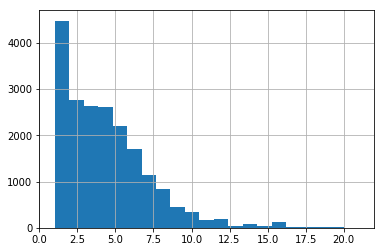

In [30]:
% matplotlib inline

num_genres_per.hist(bins=len(num_genres_per.value_counts()))

In [31]:
'unique combinations of genres:', len(Counter([tuple(set(ndarray)) for ndarray in reviews_5yrs_df.spotify_genres]))

('unique combinations of genres:', 1135)

## New quilt revision (3)

In [32]:
deephypebot._set(['reviews_and_metadata_5yrs'], reviews_5yrs_df)
deephypebot.reviews_and_metadata_5yrs()

,artist,artist_id,author,content,date_published,dek,desc,direction,domain,error,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,None,New Music\nMt. Joy reached out to us with the ...,2017-11-20T13:33:10.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.buffablog.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.1780,144.458,199827.0,4.0
1,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,Martin,Folk rockers Mt. Joy have debuted their new so...,2017-11-16T00:00:00.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.discobelle.net,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.1780,144.458,199827.0,4.0
2,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,Nasko,You know we're digging Mt. Joy.\nTheir new sin...,2017-11-14T14:30:26.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.stereofox.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.1780,144.458,199827.0,4.0
3,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,D & d,"Nothing against the profession, but the U.S. h...",2018-06-20T10:53:00.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,indieobsessive.blogspot.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.1780,144.458,199827.0,4.0
4,Opia,70zHrrrPfBkVV44AEhFyyh,Nat Morawski,Connecticut duo Opia have released a guitar he...,2018-05-24T00:00:00.000Z,NaN,\n\nI don’t know why but this feels like a bre...,ltr,acidstag.com,NaN,...,-6.575,1.0,0.1020,0.190000,0.000034,0.0625,0.5820,87.974,223814.0,4.0
5,Opia,70zHrrrPfBkVV44AEhFyyh,Adeel Amini,Now this is inventive. Not that we'd expect an...,2018-05-17T11:30:22.000Z,NaN,\n\nI don’t know why but this feels like a bre...,ltr,pressplayok.com,NaN,...,-6.575,1.0,0.1020,0.190000,0.000034,0.0625,0.5820,87.974,223814.0,4.0
6,ELOHIM,6wKxOKEA3K6R2UZ3COLXEY,Oblivious Pop,Since the very first release from Elohim about...,2018-06-20T16:01:00.000Z,NaN,\n\n?\n\n,ltr,www.obliviouspop.com,NaN,...,-6.560,1.0,0.0347,0.139000,0.000003,0.1110,0.2990,120.046,225531.0,4.0
7,ELOHIM,6wKxOKEA3K6R2UZ3COLXEY,None,New Music\nNow this is how you get a party sta...,2018-05-09T22:44:56.000Z,NaN,\n\n?\n\n,ltr,www.buffablog.com,NaN,...,-6.560,1.0,0.0347,0.139000,0.000003,0.1110,0.2990,120.046,225531.0,4.0
8,ELOHIM,6wKxOKEA3K6R2UZ3COLXEY,None,"This Friday, April 27th, ELOHIM releases her l...",None,NaN,\n\n?\n\n,ltr,www.theautumnroses.com,NaN,...,-6.560,1.0,0.0347,0.139000,0.000003,0.1110,0.2990,120.046,225531.0,4.0
9,ELOHIM,6wKxOKEA3K6R2UZ3COLXEY,None,What a long way Elohim has come since the rele...,2018-04-24T17:12:03.000Z,NaN,\n\n?\n\n,ltr,www.highclouds.org,NaN,...,-6.560,1.0,0.0347,0.139000,0.000003,0.1110,0.2990,120.046,225531.0,4.0


In [33]:
deephypebot._meta['description'] = 'All reviews contain 1+ "top" genres'

In [34]:
quilt.build(pkg_name, deephypebot) # revision3
quilt.inspect(pkg_name)

/home/ubuntu/.local/share/QuiltCli/quilt_packages/pkgs/Quilt/iconix/deephypebot
└── reviews_and_metadata_5yrs: shape (19889, 45), types 'artist': object, 'artist_id': object, 'author': object, 'conte…


In [35]:
quilt.login()
quilt.push(pkg_name, is_public=True)

Launching a web browser...
If that didn't work, please visit the following URL: https://pkg.quiltdata.com/login
Failed to launch the browser: Command '['xdg-open', 'https://pkg.quiltdata.com/login']' returned non-zero exit status 3.

Enter the code from the webpage: eyJjb2RlIjogIjg3MTM3MzZkLTgwNDAtNGEyNi05OTUyLTc5MTRmYjg2NTNmOCIsICJpZCI6ICJkMzI3ZTdkYS1lZDFiLTRiMWMtYTFlMC1lM2ZkNzk4NDJlMzkifQ==
Fetching upload URLs from the registry...


  0%|          | 0.00/29.1M [00:00<?, ?B/s]

Uploading 2 fragments (29078344 bytes)...


100%|██████████| 29.1M/29.1M [00:03<00:00, 9.31MB/s]  


Uploading package metadata...
Updating the 'latest' tag...
Push complete. iconix/deephypebot is live:
https://quiltdata.com/package/iconix/deephypebot
